In [24]:
#importing the required modules
import seaborn as sns
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import numpy as np
import seaborn as sns

In [25]:
from tqdm import tqdm, notebook
notebook.tqdm().pandas()

0it [00:00, ?it/s]

In [26]:
# Small adjustments to default style of plots, making sure it's readable and colorblind-friendly everywhere
plt.style.use('seaborn-colorblind')
plt.rcParams.update({'font.size' : 12.5,
                     'figure.figsize':(25,7)})

Get the path to retrieve data from local folder

#### Using the provided csv file to link qids with meaningful names for speakers metadata

In [27]:
df_lookup = pd.read_csv('wikidata_labels_descriptions_quotebank.csv.bz2',compression = 'bz2',index_col='QID')

## Speakers Aggregation

### Import quotes data

In [28]:
#Retrieve the dataset containing all speakers with the fraction of the colloquial language 
#Import the speakers metadata
#path = r'/Users/jules/kDrive/onedrive/Documents_Onedrive/EPFL/MA3/ADA/Project/Dataset/BIG_SAMPLE/'
#file_path = path+'Sample_2020_classified.json.bz2'

path = r'/Users/jules/kDrive/onedrive/Documents_Onedrive/EPFL/MA3/ADA/Project/Dataset/BIG_SAMPLE/Results_LR/'
file_path = path+'df_quotes_pol_all_classified_2methods.json.bz2'

In [29]:
df_quotes =  pd.read_json(file_path,compression = 'bz2',lines = True)

In [30]:
df_quotes.columns

Index(['quoteID', 'quotation', 'speaker', 'qid_unique', 'date', 'urls', 'p1',
       'p2', 'delta_p', 'year', 'label', 'aliases', 'date_of_birth',
       'nationality', 'gender', 'lastrevid', 'ethnic_group',
       'US_congress_bio_ID', 'occupation', 'party', 'academic_degree', 'id',
       'candidacy', 'type', 'religion', 'age', 'bi_party',
       'colloquial_NaiveBayes', 'colloquial_contractions'],
      dtype='object')

### Import american politic speakers metadata

In [31]:
file_path = path+'df_speakers_pol.json.bz2'
df_speakers_meta =  pd.read_json(file_path,compression = 'bz2',lines = True)

In [35]:
df_quotes

,quoteID,quotation,speaker,qid_unique,date,urls,p1,p2,delta_p,year,...,party,academic_degree,id,candidacy,type,religion,age,bi_party,colloquial_NaiveBayes,colloquial_contractions
0,2015-04-16-012993,"Come, Son, Let Me Tell You A Lie,",Robert Johnson,Q16215328,2015-04-16 12:17:09,[http://mysanantonio.com/entertainment/article...,0.6719,0.2895,0.3824,2015,...,[Q29552],None,Q16215328,None,item,None,46.0,Democrat,informal,0
1,2015-05-09-008197,Everybody grieves in their own way. I just wan...,Robert Johnson,Q16215328,2015-05-09 09:25:48,[http://www.foxbaltimore.com/news/features/top...,0.6130,0.2622,0.3508,2015,...,[Q29552],None,Q16215328,None,item,None,46.0,Democrat,informal,0
2,2015-07-31-011595,But a vast minority of sex assault victims are...,Robert Johnson,Q16215328,2015-07-31 15:21:13,[http://pix11.com/2015/07/31/men-convicted-of-...,0.9152,0.0848,0.8304,2015,...,[Q29552],None,Q16215328,None,item,None,46.0,Democrat,informal,0
3,2015-11-05-133940,We are running major law offices with major re...,Robert Johnson,Q16215328,2015-11-05 07:30:00,[http://www.nydailynews.com/new-york/exclusive...,0.7218,0.2288,0.4930,2015,...,[Q29552],None,Q16215328,None,item,None,46.0,Democrat,informal,0
4,2015-12-23-026592,"I did footings, I did walls. Right now, I'm up...",Robert Johnson,Q16215328,2015-12-23 14:38:25,[http://www.mprnews.org/story/2015/10/23/vikes...,0.7711,0.1818,0.5893,2015,...,[Q29552],None,Q16215328,None,item,None,46.0,Democrat,informal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564653,2020-03-12-051570,People in this area are very in tune with what...,Marge Anderson,Q6760269,2020-03-12 04:29:22,[https://www.recorder.com/b1-Northfield-trash-...,0.8344,0.1656,0.6688,2020,...,None,None,Q6760269,None,item,None,89.0,None,informal,1
564654,2020-03-01-037715,"to help spread facts, not fear.",Sabrina Cervantes,Q27890015,2020-03-01 01:42:05,[https://mynewsla.com/business/2020/02/29/offi...,0.8328,0.1561,0.6767,2020,...,[Q5020399],None,Q27890015,None,item,None,34.0,None,informal,0
564655,2020-03-21-041323,We knew that we needed to do more to protect o...,Luis Alejo,Q6700297,2020-03-21 19:42:48,[https://www.montereyherald.com/2020/03/21/cov...,0.8260,0.1582,0.6678,2020,...,[Q29552],None,Q6700297,None,item,None,47.0,Democrat,informal,0
564656,2020-01-28-083318,the Sheriff has enriched himself,Joel Robideaux,Q6213896,2020-01-28 00:28:26,[https://www.katc.com/news/lafayette-parish/lp...,0.7743,0.2182,0.5561,2020,...,[Q29468],None,Q6213896,None,item,None,59.0,Republican,informal,0


### Group the qi by speaker

In [40]:
#Transform str into 0/1
def replace_binary(string):
    if string == 'formal':
        out = 0
    elif string == 'informal':
        out = 1
    else:
        out = None
        
    return out

df_quotes['colloquial_NaiveBayes']=df_quotes['colloquial_NaiveBayes'].apply(lambda x: replace_binary(x))

In [47]:
df_quotes.columns

Index(['quoteID', 'quotation', 'speaker', 'qid_unique', 'date', 'urls', 'p1',
       'p2', 'delta_p', 'year', 'label', 'aliases', 'date_of_birth',
       'nationality', 'gender', 'lastrevid', 'ethnic_group',
       'US_congress_bio_ID', 'occupation', 'party', 'academic_degree', 'id',
       'candidacy', 'type', 'religion', 'age', 'bi_party',
       'colloquial_NaiveBayes', 'colloquial_contractions'],
      dtype='object')

In [82]:
def groupby_method(df_quotes,df_speakers_meta,method):
    
    df_grouped = df_quotes.groupby(['qid_unique',method]).size().unstack(fill_value=0).reset_index()
    df_grouped['quotes_number'] = df_grouped[1]+df_grouped[0]
    df_grouped.sort_values(['quotes_number'], ascending=False) 

    # Create also a column (called "fraction") that computes the fraction of colloquial quotes over total quotations. (by speaker)
    df_grouped['fraction']=df_grouped[1]/(df_grouped['quotes_number'])
    df_grouped.reset_index().sort_values(['fraction'], ascending=False)
    df_grouped.reset_index().sort_values(['quotes_number'], ascending=False)
    #Merge with speakers metadata
    df_aggreg = df_grouped.merge(df_speakers_meta,how='inner',left_on='qid_unique', right_on='id')
    df_aggreg=df_aggreg.reset_index().sort_values(['quotes_number'], ascending=False)
    return df_aggreg

In [83]:
df_aggreg_Naive = groupby_method(df_quotes,df_speakers_meta,'colloquial_NaiveBayes')
df_aggreg_contractions = groupby_method(df_quotes,df_speakers_meta,'colloquial_contractions')

In [84]:
df_aggreg_Naive

,index,qid_unique,0,1,quotes_number,fraction,label,aliases,date_of_birth,nationality,...,US_congress_bio_ID,occupation,party,academic_degree,id,candidacy,type,religion,age,bi_party
7134,7134,Q76,9172,10496,19668,0.533659,Barack Obama,"[Barack Hussein Obama II, Barack Obama II, Bar...",-2.654208e+11,[Q30],...,O000167,"[Q82955, Q40348, Q15958642, Q28532974, Q372436]",[Q29552],"[Q1765120, Q1540185]",Q76,"[Q3586671, Q45578, Q4226, Q4791768, Q17067714,...",item,"[Q23540, Q1062789, Q960252, Q426316]",60.0,Democrat
3263,3263,Q359442,6449,7149,13598,0.525739,Bernie Sanders,[Bernard Sanders],-8.935488e+11,[Q30],...,S000033,"[Q82955, Q1930187, Q154549, Q1622272, Q36180, ...","[Q6542163, Q29552, Q327591, Q327591, Q29552]",[Q1765120],Q359442,None,item,[Q9268],80.0,Democrat
5694,5694,Q6294,4300,7945,12245,0.648836,Hillary Clinton,"[Hillary Rodham Clinton, Hillary Rodham, Hilla...",-7.000992e+11,[Q30],...,C001041,"[Q82955, Q40348, Q193391, Q36180, Q18814623, Q...","[Q29552, Q29468]","[Q163727, Q1540185]",Q6294,"[Q699872, Q4791768]",item,[Q33203],74.0,Republican
50,50,Q11673,3904,4982,8886,0.560657,Andrew Cuomo,[Andrew Mark Cuomo],-3.809376e+11,[Q30],...,None,"[Q40348, Q82955]",[Q29552],[Q1540185],Q11673,"[Q22023432, Q65047185]",item,[Q1841],64.0,Democrat
2040,2040,Q180589,3622,3954,7576,0.521911,Boris Johnson,"[Boris, Alexander Boris de Pfeffel Johnson, Bo...",-1.747008e+11,"[Q30, Q145]",...,None,"[Q1930187, Q82955, Q1607826, Q36180, Q11774202...",[Q9626],None,Q180589,"[Q30173038, Q30325756, Q428598, Q590740, Q3586...",item,[Q6423963],57.0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4968,4968,Q5543037,0,1,1,1.000000,George Onorato,None,-1.298765e+12,[Q30],...,None,[Q82955],[Q29552],None,Q5543037,None,item,None,93.0,Democrat
4965,4965,Q5541324,0,1,1,1.000000,George Keverian,"[Keverian, George]",-1.217549e+12,[Q30],...,None,[Q82955],[Q29552],None,Q5541324,None,item,None,90.0,Democrat
4955,4955,Q5537813,0,1,1,1.000000,George Chanos,None,-6.311520e+11,[Q30],...,None,"[Q40348, Q82955]",[Q29468],None,Q5537813,None,item,None,71.0,Republican
4954,4954,Q5536599,0,1,1,1.000000,George Bagby,None,-1.030666e+12,[Q30],...,None,[Q82955],[Q29552],None,Q5536599,None,item,None,84.0,Democrat


## Statistics

### Top 10 speakers per number of quotes

Text(0, 0.5, 'Number of quotes')

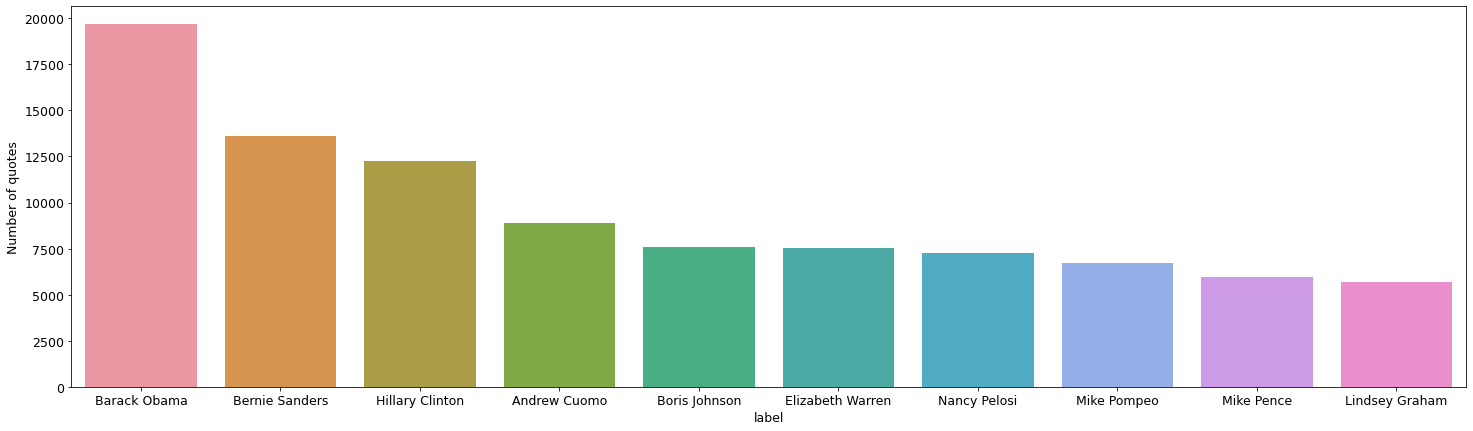

In [91]:
ax = sns.barplot(x="label", y="quotes_number", data=df_aggreg_Naive[:10])
ax.set_ylabel('Number of quotes')

### Top 10 speakers by colloquial fraction

In [104]:
#Consider only speakers that have more than a specific number of quotes
thresh = 100

df_top10 = df_aggreg_Naive[df_aggreg_Naive['quotes_number']>thresh]
df_top10=df_top10.reset_index().sort_values(['fraction'], ascending=False)

Text(0.5, 1.0, 'Top 10 colloquial speakers with Naive method')

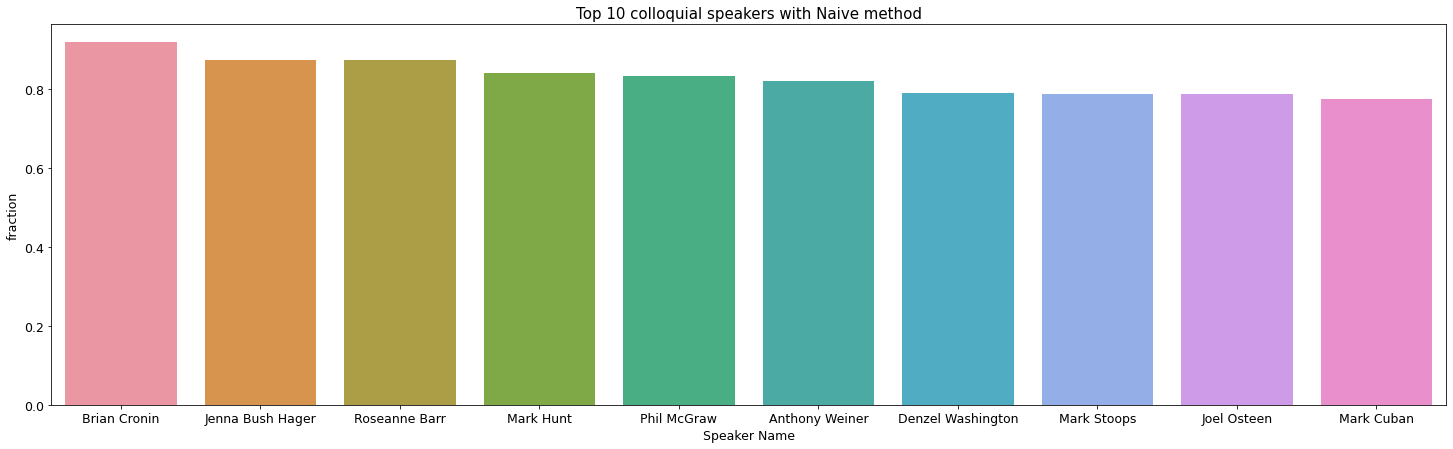

In [106]:
ax = sns.barplot(x="label", y="fraction", data=df_top10[:10])
ax.set_xlabel('Speaker Name')
ax.set_ylabel('Average Fraction')
ax.set_title('Top 10 colloquial speakers with Naive method')
path =r'/Users/jules/kDrive/onedrive/Documents_Onedrive/EPFL/MA3/ADA/Project/Figures/'
fig.savefig(path+'polAgrregPlot_top10_Naive.svg',format = 'svg',bbox_inches='tight')
fig.savefig(path+'polAgrregPlot_top10_Naive.png',format = 'png',bbox_inches='tight')

Text(0, 0.5, 'Average colloquial fraction')

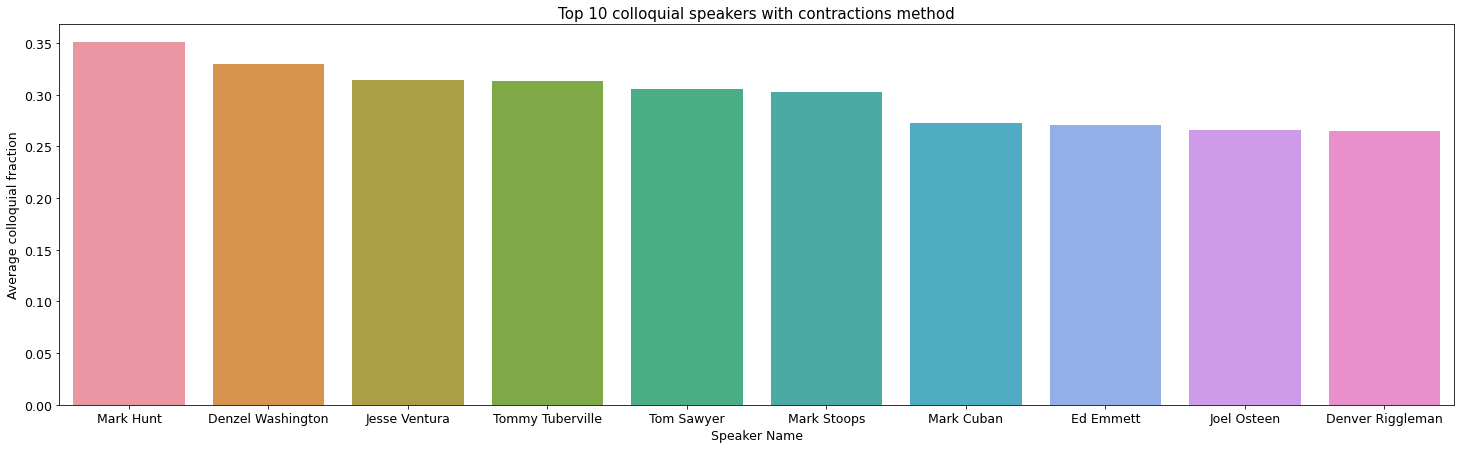

In [107]:
df_top10_2 = df_aggreg_contractions[df_aggreg_contractions['quotes_number']>thresh]
df_top10_2=df_top10_2.reset_index().sort_values(['fraction'], ascending=False)
ax = sns.barplot(x="label", y="fraction", data=df_top10_2[:10])
ax.set_title('Top 10 colloquial speakers with contractions method')
ax.set_xlabel('Speaker Name')
ax.set_ylabel('Average colloquial fraction')
path =r'/Users/jules/kDrive/onedrive/Documents_Onedrive/EPFL/MA3/ADA/Project/Figures/'
fig.savefig(path+'polAgrregPlot_top10_contractions.svg',format = 'svg',bbox_inches='tight')
fig.savefig(path+'polAgrregPlot_top10_contractions.png',format = 'png',bbox_inches='tight')

### Plot distribution for number of quotations

Text(0.5, 0, 'Number of quotes')

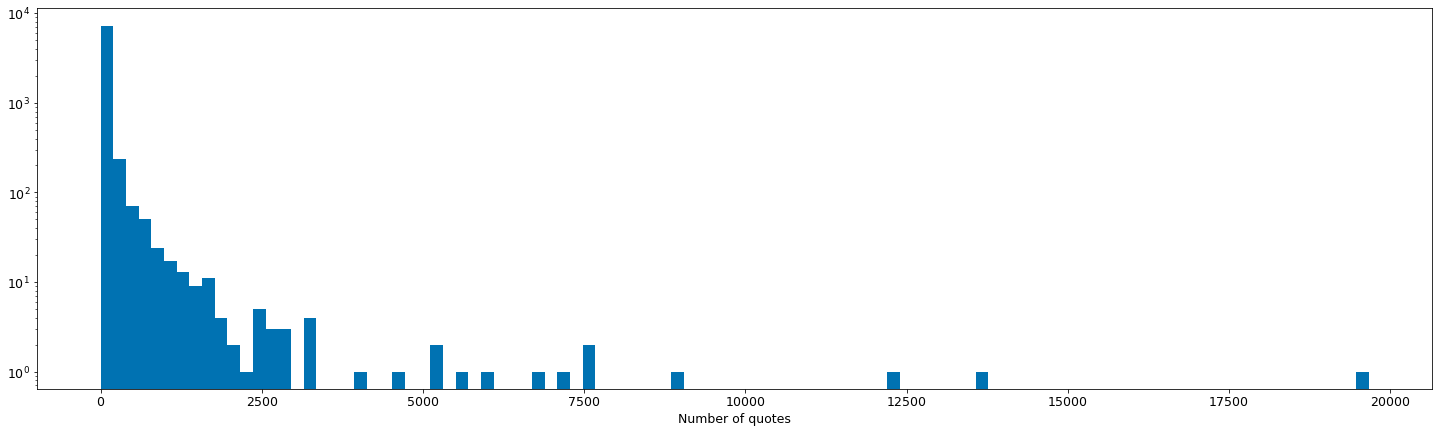

In [44]:
plt.hist(df_aggreg['quotes_number'],bins=100,log=True);
plt.xlabel('Number of quotes')

Text(0.5, 0, 'Colloquial fraction')

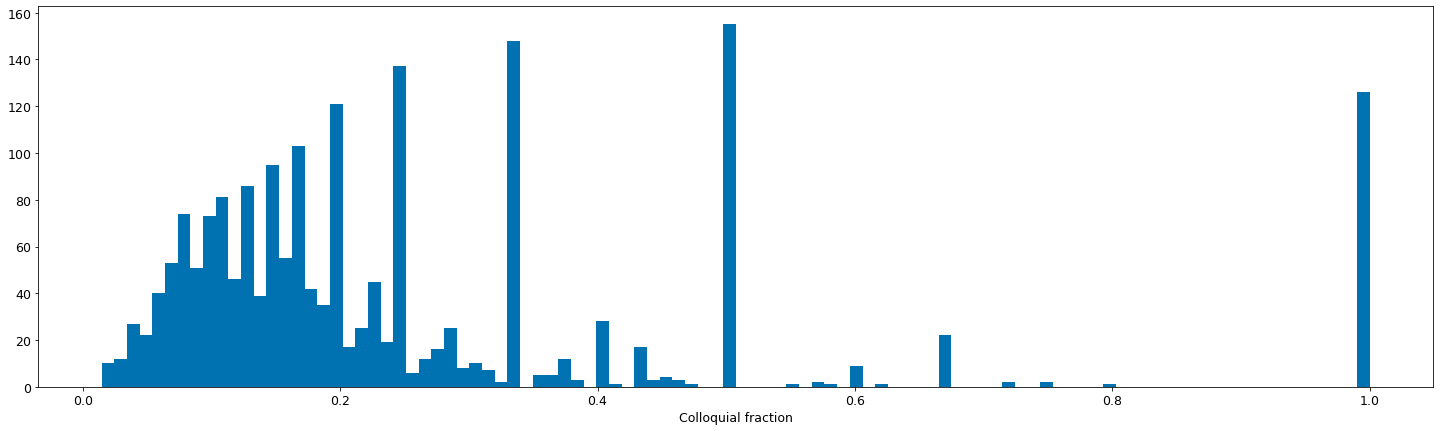

In [40]:
plt.hist(df_plot['fraction'],bins=100,log=False);
plt.xlabel('Colloquial fraction')


### Plot the repartition in ages

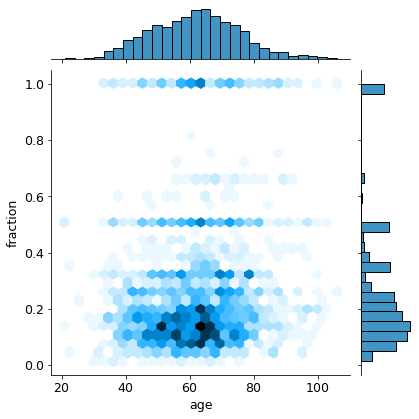

In [26]:
#Remove all politics with fraction equal to 0
df_plot = df_aggreg[df_aggreg['fraction']!=0]
sns.jointplot(x=df_plot['age'], y=df_plot['fraction'], kind="hex")

### Plot the repartition of colloquial between Democrat and Republican 

Text(0, 0.5, 'Average fraction of colloquial')

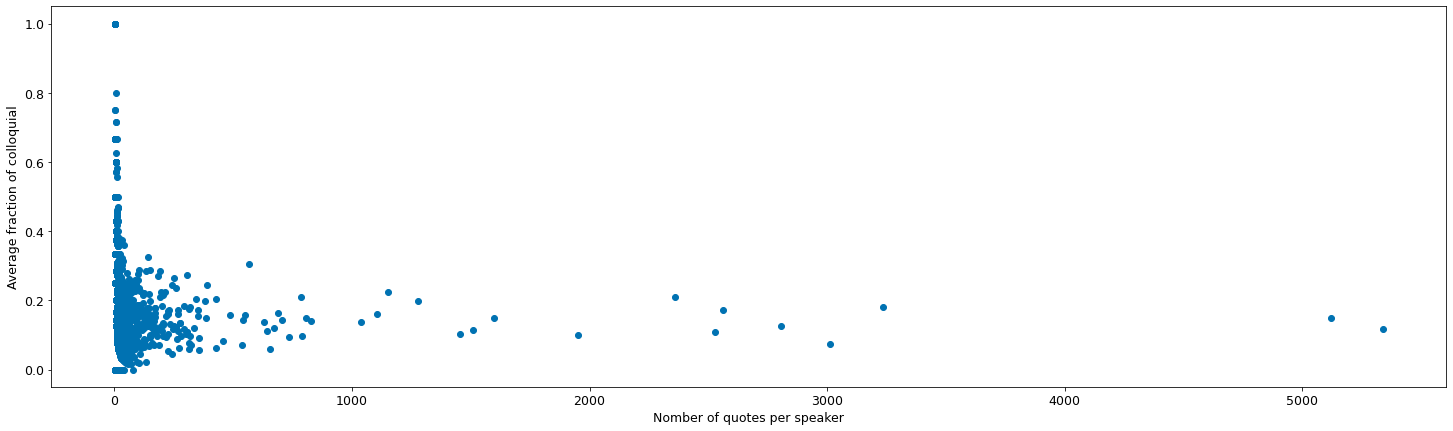

In [42]:
plt.scatter(df_aggreg['quotes_number'], df_aggreg['fraction'])
plt.xlabel('Nomber of quotes per speaker')
plt.ylabel('Average fraction of colloquial')

### Plot the distribution of colloquial language speaker in political party

[Text(0, 0.5, 'Average fraction of colloquial quotations')]

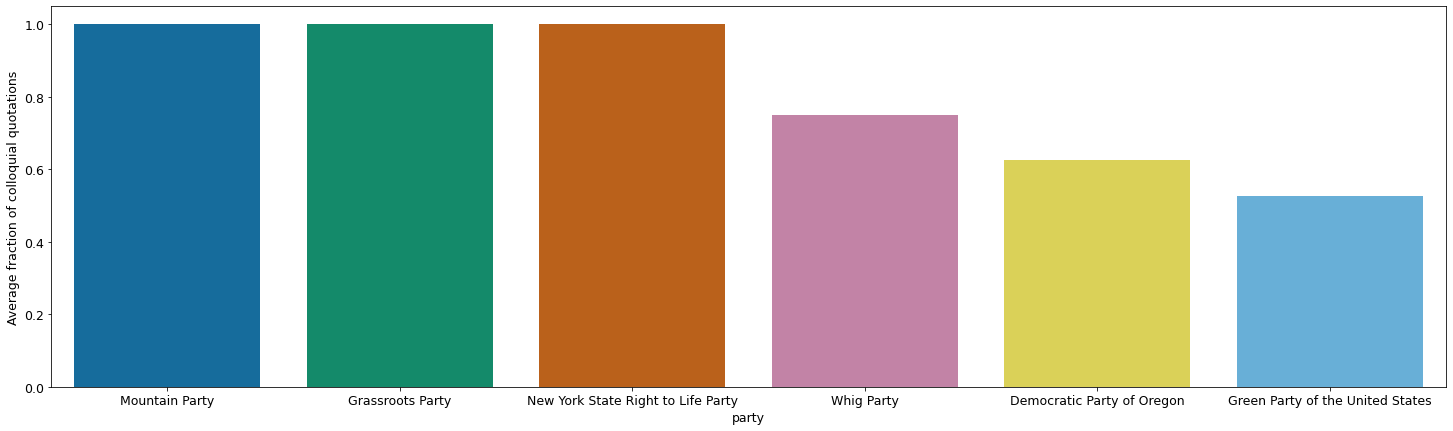

In [18]:

df_party=df_polUS_2.copy()
#Replace label column at the first place to see speakers names
df_party.dropna(axis = 0, subset=['party'], inplace=True)

#Drop all speakers that several parties
oneparty_cond = df_party['party'].apply(lambda x: len(x)==1)

#Transforma a list into one element
df_party['party'] = df_party['party'].apply(lambda x: x[0]) 

df_party = df_party[oneparty_cond]

#Not taking in account the occupation with fraction equals to 1 (correspond to speakers with not sufficient amount of quotations)
df_plot = df_party.groupby('party')['fraction'].mean() \
           .reset_index(name='mean_fraction')\
            .sort_values(['mean_fraction'], ascending=False)
#Not taking in account the occupation with fraction equals to 1 (correspond to speakers with not sufficient amount of quotations)

#df_plot = df_plot[df_plot['mean_fraction']!=1]
df_plot['party'] = df_plot['party'].apply(lambda x: df_lookup.loc[x]['Label'])

ax = sns.barplot(x='party', y="mean_fraction", data=df_plot[:6])
ax.set(ylabel='Average fraction of colloquial quotations')

In [19]:
print("There are {} parties in our dataset".format(len(df_plot)))

There are 62 parties in our dataset
